In [2]:
from imutils import paths
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
from keras import models
from keras import layers
from keras import backend as K
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


# Loading Images

In [10]:
# Global
Base_dir = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/CatDog/Data/'
lb = LabelBinarizer()

### Helpers

In [9]:
# Label Extractor
def extract_labels(img_dir, img_path_list):
    img_labels = []
    img_dir_len = len(img_dir)
    
    for img_path in img_path_list:
        img_label = img_path[img_dir_len:]
        img_labels.append(img_label[:3])
    
    return img_labels

# Group Two Lists
def group_data(list_one, list_two):
    joint_list = list_one
    
    for item in list_two:
        joint_list.append(item)
    
    return joint_list

# Resizer (ignore image aspect ratio)
def img_resizer(img, width, height, interpolation):
    inter = interpolation
    return cv2.resize(img, (width, height), inter)

# Image to array preprocessor
def img2array(img, dataFormat=None):
    return img_to_array(img, data_format=dataFormat)

# Image Loader
def load_img(img_paths, verbose=1):
    data = []
    images = []
    interpolation = cv2.INTER_AREA
    
    for (i, img_path) in enumerate(img_paths):
        img = cv2.imread(img_path)
        images.append(img)
        
        if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
            print('[INFO] processed {} / {}'.format((i + 1), len(img_paths)))
    
    images = np.array(images)
    
    for image in images:
        image = img_resizer(image, 32, 32, interpolation)
        image = img2array(image)
        data.append(image)

        
    
    data = np.array(data)
    
    return data

### Train

In [4]:
# Cats
train_cats_dir = os.path.join(Base_dir, 'train/cats/')
train_cats_images = list(paths.list_images(train_cats_dir))
train_cats_labels = extract_labels(train_cats_dir, train_cats_images)


# Dogs
train_dogs_dir = os.path.join(Base_dir, 'train/dogs/')
train_dogs_images = list(paths.list_images(train_dogs_dir))
train_dogs_labels = extract_labels(train_dogs_dir, train_dogs_images)


# Group cats and dogs (data, labels)
train_data_paths = group_data(train_cats_images, train_dogs_images)
train_labels = group_data(train_cats_labels, train_dogs_labels)

# Shuffle
(train_data_paths, train_labels) = shuffle(train_data_paths, train_labels)

# Train data

train_data = load_img(train_data_paths, verbose=500)
train_data = train_data.astype('float') / 255.0

# Convert labels to numpy array
train_labels = np.array(train_labels)

# Binarize labels
labels = train_labels
train_labels = lb.fit_transform(train_labels)

for i in np.arange(0, 10):
    print(labels[i], "  |  ", train_labels[i])
    
# # Check Ups
# print()
# print("Train data type: ", type(train_data))
# print("Train labels type: ", type(train_labels))
# print("Train data shape: ", train_data.shape)
# print("Train labels shape: ", train_labels.shape)
# print('Train data length: ', len(train_data))
# print('Train labels length: ', len(train_labels))
# print()

[INFO] processed 500 / 16500
[INFO] processed 1000 / 16500
[INFO] processed 1500 / 16500
[INFO] processed 2000 / 16500
[INFO] processed 2500 / 16500
[INFO] processed 3000 / 16500
[INFO] processed 3500 / 16500
[INFO] processed 4000 / 16500
[INFO] processed 4500 / 16500
[INFO] processed 5000 / 16500
[INFO] processed 5500 / 16500
[INFO] processed 6000 / 16500
[INFO] processed 6500 / 16500
[INFO] processed 7000 / 16500
[INFO] processed 7500 / 16500
[INFO] processed 8000 / 16500
[INFO] processed 8500 / 16500
[INFO] processed 9000 / 16500
[INFO] processed 9500 / 16500
[INFO] processed 10000 / 16500
[INFO] processed 10500 / 16500
[INFO] processed 11000 / 16500
[INFO] processed 11500 / 16500
[INFO] processed 12000 / 16500
[INFO] processed 12500 / 16500
[INFO] processed 13000 / 16500
[INFO] processed 13500 / 16500
[INFO] processed 14000 / 16500
[INFO] processed 14500 / 16500
[INFO] processed 15000 / 16500
[INFO] processed 15500 / 16500
[INFO] processed 16000 / 16500
[INFO] processed 16500 / 165

C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


dog   |   [1]
cat   |   [0]
cat   |   [0]
dog   |   [1]
cat   |   [0]
dog   |   [1]
dog   |   [1]
dog   |   [1]
cat   |   [0]
cat   |   [0]


### Validation

In [5]:
# Cats
validation_cats_dir = os.path.join(Base_dir, 'validation/cats/')
validation_cats_images = list(paths.list_images(validation_cats_dir))
validation_cats_labels = extract_labels(validation_cats_dir, validation_cats_images)

# Dogs
validation_dogs_dir = os.path.join(Base_dir, 'validation/dogs/')
validation_dogs_images = list(paths.list_images(validation_dogs_dir))
validation_dogs_labels = extract_labels(validation_dogs_dir, validation_dogs_images)

# Group Validation
validation_data_paths = group_data(validation_cats_images, validation_dogs_images)
validation_labels = group_data(validation_cats_labels, validation_dogs_labels)

# Shuffle
(validation_data_paths, validation_labels) = shuffle(validation_data_paths, validation_labels)

# Validation data
validation_data = load_img(validation_data_paths, verbose=500)
validation_data = validation_data.astype('float') / 255.0

# Convert labels to numpy array
validation_labels = np.array(validation_labels)

# Binerize labels
labels = validation_labels
validation_labels = lb.fit_transform(validation_labels)

for i in np.arange(0, 10):
    print(labels[i], " |  ", validation_labels[i])

# # Check Ups
# print()
# print("Validation data type: ", type(validation_data))
# print("Validation labels type: ", type(validation_labels))
# print("Validation data shape: ", validation_data.shape)

[INFO] processed 500 / 4500
[INFO] processed 1000 / 4500
[INFO] processed 1500 / 4500
[INFO] processed 2000 / 4500
[INFO] processed 2500 / 4500
[INFO] processed 3000 / 4500
[INFO] processed 3500 / 4500
[INFO] processed 4000 / 4500
[INFO] processed 4500 / 4500


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


cat  |   [0]
cat  |   [0]
cat  |   [0]
dog  |   [1]
dog  |   [1]
dog  |   [1]
cat  |   [0]
cat  |   [0]
cat  |   [0]
cat  |   [0]


### Test

In [6]:
# Cats
test_cats_dir = os.path.join(Base_dir, 'test/cats/')
test_cats_images = list(paths.list_images(test_cats_dir))
test_cats_labels = extract_labels(test_cats_dir, test_cats_images)

# Dogs
test_dogs_dir = os.path.join(Base_dir, 'test/dogs/')
test_dogs_images = list(paths.list_images(test_dogs_dir))
test_dogs_labels = extract_labels(test_dogs_dir, test_dogs_images)

# Group Test
test_data_paths = group_data(test_cats_images, test_dogs_images)
test_labels = group_data(test_cats_labels, test_dogs_labels)

# Shuffle
(test_data_paths, test_labels) = shuffle(test_data_paths, test_labels, random_state=0)

# Test data
test_data = load_img(test_data_paths, verbose=500)
test_data = test_data.astype('float') / 255.0

# Convert labels to numpy array
test_labels = np.array(test_labels)

# Binarize labels
labels = test_labels
test_labels = lb.fit_transform(test_labels)

for i in np.arange(0, 10):
    print(labels[i], "  |  ", test_labels[i])
    
# # Check Ups
# print()
# print("Test data type: ", type(test_data))
# print("Test labels type: ", type(test_labels))
# print("Test data shape: ", test_data.shape)

[INFO] processed 500 / 4000
[INFO] processed 1000 / 4000
[INFO] processed 1500 / 4000
[INFO] processed 2000 / 4000
[INFO] processed 2500 / 4000
[INFO] processed 3000 / 4000
[INFO] processed 3500 / 4000
[INFO] processed 4000 / 4000


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


dog   |   [1]
cat   |   [0]
dog   |   [1]
dog   |   [1]
cat   |   [0]
cat   |   [0]
cat   |   [0]
cat   |   [0]
cat   |   [0]
cat   |   [0]


# CNN Architecture

In [7]:
# Filters
filters = 32

# Stride
stride = (3, 3)

# Classes
classes = 2

# Input_shape
width = 32
height = 32
depth = 3 
input_shape = (width, height, depth)

if K.image_data_format() == 'channels_first':
    input_shape = (depth, width, height)

# Architecture
model = models.Sequential()
model.add(layers.Conv2D(filters, stride, padding='same', input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

# Check Up
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 32769     
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


# Compile and Train

In [8]:
# Compile
sgd = SGD(lr=0.005)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(validation_data, validation_labels))

Train on 16500 samples, validate on 4500 samples
Epoch 1/100
16500/16500 [==============================] - 13s 808us/step - loss: 0.6843 - acc: 0.5511 - val_loss: 0.6734 - val_acc: 0.58607 - ETA: 7s -
Epoch 2/100
16500/16500 [==============================] - 6s 340us/step - loss: 0.6673 - acc: 0.5960 - val_loss: 0.6609 - val_acc: 0.6160
Epoch 3/100
16500/16500 [==============================] - 6s 336us/step - loss: 0.6573 - acc: 0.6186 - val_loss: 0.6529 - val_acc: 0.6298
Epoch 4/100
16500/16500 [==============================] - 9s 552us/step - loss: 0.6476 - acc: 0.6285 - val_loss: 0.6462 - val_acc: 0.6298
Epoch 5/100
16500/16500 [==============================] - 6s 335us/step - loss: 0.6400 - acc: 0.6441 - val_loss: 0.6383 - val_acc: 0.6540
Epoch 6/100
16500/16500 [==============================] - 6s 337us/step - loss: 0.6309 - acc: 0.6544 - val_loss: 0.6296 - val_acc: 0.6633
Epoch 7/100
16500/16500 [==============================] - 6s 338us/step - loss: 0.6232 - acc: 0.6601 -

# Plotting Results

In [9]:
# Dictionary
history_dict = history.history
history_dict.keys()

# Data
epochs = np.arange(0, 100)

accuracy = history_dict['acc']
validation_accuracy = history_dict['val_acc']

loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Graph
plt.style.use('ggplot')

### Train Accuracy vs Validation Accuracy

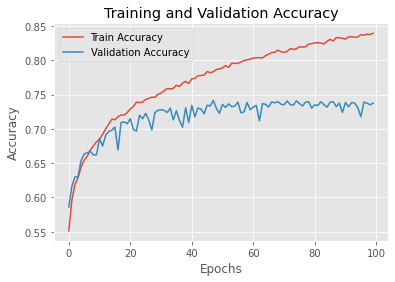

In [10]:
plt.plot(epochs, accuracy, label='Train Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Train Loss vs Validation Loss

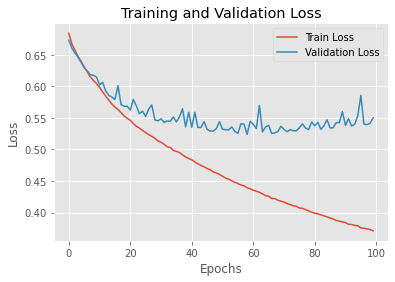

In [11]:
plt.clf()
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation

In [12]:
result = model.evaluate(test_data, test_labels)
print(result)

4000/4000 [==============================] - 1s 184us/step
[0.5615849978923798, 0.7357500195503235]


# Predictions

In [13]:
predX = [test_data[0]]
predX = np.array(predX)
predictions = model.predict(predX)
print(predictions)

[[0.9614976]]


# shallowNet on CIFAR-10

In [13]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load Dataset

In [18]:
# Load training and test data
(trainX, trainY,), (testX, testY) = cifar10.load_data()

# Normalization [0, 1]
trainX = trainX.astype('float') / 255.0
testX = testX.astype('float') / 255.0

# Validation
(trainX, validationX, trainY, validationY) = train_test_split(trainX, trainY, test_size=0.25)

# Check Up
print(trainX.shape)
print(validationX.shape)
print(testX.shape)

(37500, 32, 32, 3)
(12500, 32, 32, 3)
(10000, 32, 32, 3)


In [23]:
# Label Binarization
trainY = lb.fit_transform(trainY)
validationY = lb.fit_transform(validationY)
testY = lb.fit_transform(testY)

# Check Up
print(trainY.shape)
print(validationY.shape)
print(testY.shape)

(37500, 10)
(12500, 10)
(10000, 10)


In [24]:
#  Label Dictionary
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Modified Architecture

In [25]:
# Filters
filters = 32

# Stride
stride = (3, 3)

# Classes
classes = 10

# Input_shape
width = 32
height = 32
depth = 3 
input_shape = (width, height, depth)

if K.image_data_format() == 'channels_first':
    input_shape = (depth, width, height)

# Architecture
model = models.Sequential()
model.add(layers.Conv2D(filters, stride, padding='same', input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(classes))
model.add(layers.Activation('softmax'))

# Check Up
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                327690    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


# Compile and Train

In [27]:
opt = SGD(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(trainX, trainY, epochs=40, batch_size=32, validation_data=(validationX, validationY), verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/40
37500/37500 [==============================] - 21s 572us/step - loss: 1.8361 - acc: 0.3557 - val_loss: 1.6549 - val_acc: 0.4311: 1.8404 - ac
Epoch 2/40
37500/37500 [==============================] - 16s 429us/step - loss: 1.5816 - acc: 0.4510 - val_loss: 1.5153 - val_acc: 0.4702
Epoch 3/40
37500/37500 [==============================] - 16s 433us/step - loss: 1.4334 - acc: 0.4994 - val_loss: 1.4257 - val_acc: 0.5018
Epoch 4/40
37500/37500 [==============================] - 72s 2ms/step - loss: 1.3418 - acc: 0.5317 - val_loss: 1.4605 - val_acc: 0.4668
Epoch 5/40
37500/37500 [==============================] - 21s 561us/step - loss: 1.2811 - acc: 0.5502 - val_loss: 1.3375 - val_acc: 0.5281
Epoch 6/40
37500/37500 [==============================] - 19s 508us/step - loss: 1.2423 - acc: 0.5647 - val_loss: 1.3450 - val_acc: 0.5191
Epoch 7/40
37500/37500 [==============================] - 15s 402us/step - loss: 1.2101 - acc: 0.5786 - v